# Sistem Rekomendasi buku

- Dicoding id: yosriko
- Email: yosrikosabelekake@gmail.com

# Data Understanding

Memuat data dari googleplaystore.csv dan menampilkan head dari data

In [ ]:
import pandas as pd
from IPython.display import display

df=pd.read_csv('/content/googleplaystore.csv')

display(df.head())


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Melihat ukuran baris dan kolom dari dataframe

In [ ]:
df.shape

(10841, 13)

Melihat gambaran yang lengkap mengenai tipe data dan kelengkapan data di tiap atribut, serta melihat value null disetiap kolomnya, ini dibutuhkan untu menentukan tipe data cleaning apa yang perlu dilakukan

In [ ]:
# Melihat informasi umum mengenai data
df.info()

# Menyajikan statistik deskriptif
df.describe(include='all')

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


Application counts by Install Category:
 Install Category
1K and below    1804
1M and above    1708
100K            1533
10K             1384
Name: count, dtype: int64


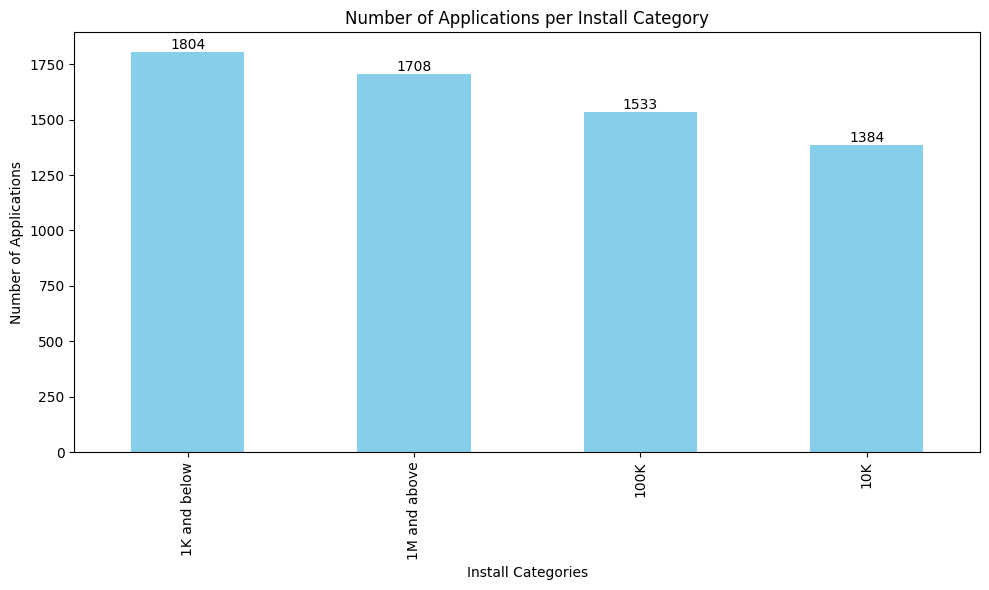

In [ ]:
import matplotlib.pyplot as plt
# Step 1: Clean the Installs Data
df['Installs'] = df['Installs'].astype(str).str.replace(',', '').str.replace('+', '')  # Clean the data
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to numeric, setting errors to NaN

# Step 2: Create Install Categories
# Define bins for the install categories
bins = [0, 1000, 10000, 100000, 1000000]
labels = ['1K and below', '10K', '100K', '1M and above']

# Categorize installs
df['Install Category'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

# Step 3: Count Applications per Install Category
install_category_counts = df['Install Category'].value_counts()

# Print counts for debugging
print("Application counts by Install Category:\n", install_category_counts)

# Step 4: Visualization
fig, ax = plt.subplots(figsize=(10, 6))
install_category_counts.plot(kind='bar', color='skyblue', ax=ax)

# Set labels and title
ax.set_xlabel('Install Categories')
ax.set_ylabel('Number of Applications')
ax.set_title('Number of Applications per Install Category')
ax.bar_label(ax.containers[0])  # Add labels on top of bars

# Adjust layout
plt.tight_layout()
plt.show()

**Insight:** Distribusi ini dapat mencerminkan preferensi dan perilaku konsumen terkait dengan instalasi aplikasi. Sebagai contoh, sebagian besar aplikasi masuk dalam kategori "1M and above", ini bisa menunjukkan tren di mana pengguna lebih menyukai aplikasi yang sudah mapan atau populer. Hal ini menjadikan installs dapat menjadi salah satu parameter penentu rekomendasi

# Data Preparation

### Data Cleaning

Menghapus kolom yang tidak diperlukan, menghapus aplikasi yang tidak memiliki type, dan mengubah bentuk install menjadi integer dan memberikan skala pada kolom install, untuk mempermudah indexing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Hapus kolom yang tidak diperlukan
df_clean = df[['App', 'Genres', 'Type', 'Price', 'Installs']]

# Menghapus app yang tidak memiliki type
df_clean = df_clean.dropna(subset=['Type'])

# Ubah kolom installs menjadi numerik (hilangkan tanda +, . dan , jika ada)
df_clean['Installs'] = df_clean['Installs'].replace('Free', '0')

# Gunakan MinMaxScaler untuk menormalkan nilai install ke dalam skala 0-1
scaler = MinMaxScaler()
df_clean['install_scaled'] = scaler.fit_transform(df_clean[['Installs']])

# Tampilkan data yang sudah dibersihkan
print(df_clean.isnull().sum())
display(df_clean.head())

App               0
Genres            0
Type              0
Price             0
Installs          1
install_scaled    1
dtype: int64


,App,Genres,Type,Price,Installs,install_scaled
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,Free,0,10000.0,0.00001
1,Coloring book moana,Art & Design;Pretend Play,Free,0,500000.0,0.00050
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,Free,0,5000000.0,0.00500
3,Sketch - Draw & Paint,Art & Design,Free,0,50000000.0,0.05000
4,Pixel Draw - Number Art Coloring Book,Art & Design;Creativity,Free,0,100000.0,0.00010


  # Text Processing

  Melakukan tokenisasi pada kombinasi dari seluruh atribut aplikasi

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
# Inisialisasi TF-IDF Vectorizer untuk mengubah deskripsi menjadi fitur numerik
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

df_clean['combined_features'] = df_clean['App'] + " " + df_clean['Genres'] + " " + df_clean[ 'Type']+ " " + df_clean[ 'Price']



## Text Veature Extraction

Mengubah dataset yang sebelumnya berupa text atau sekumpulan atribut, menjadi bentuk vector agar arahnya dapat dibandingkan ketika melakukan cosine similartiy

In [ ]:
# Transformasi 'combined_features' ke dalam bentuk matriks TF-IDF
tfidf_matrix = tfidf.fit_transform(df_clean['combined_features'].str.lower())


print(tfidf_matrix)

  (0, 5705)	0.2710301145775802
  (0, 2491)	0.2837507660538116
  (0, 1327)	0.3705291563878378
  (0, 1308)	0.2817882805183124
  (0, 3400)	0.4452989763089453
  (0, 6650)	0.5028577329318307
  (0, 590)	0.29634944031852056
  (0, 2117)	0.30058546261712965
  (1, 590)	0.3325957351051924
  (1, 2117)	0.33734986235717435
  (1, 1703)	0.3826077012977889
  (1, 1081)	0.3653587631018097
  (1, 4937)	0.5236046542414575
  (1, 5957)	0.33987929735344363
  (1, 5802)	0.3256066611373039
  (2, 590)	0.28583785296370595
  (2, 2117)	0.28992362251211273
  (2, 4332)	0.293220478730881
  (2, 4469)	0.31231028105007885
  (2, 4473)	0.25384338412182483
  (2, 1811)	0.41496642317795474
  (2, 7513)	0.3573863963047066
  (2, 3594)	0.3944767010715566
  (2, 539)	0.36159999190585945
  (3, 590)	0.36007066333091975
  :	:
  (10835, 7327)	0.6178161764921863
  (10835, 4692)	0.6178161764921863
  (10836, 2496)	0.19262552089901366
  (10836, 649)	0.38319563738461965
  (10836, 4864)	0.47596965485065645
  (10836, 7423)	0.47596965485065645
 

# Modeling

Membuat model dengan membandingkan vectorize query dengan saved token, jika terdapat kesamaan similarity maka index diurutkan berdasarkan jumlah install

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations_from_query(query):
    # Transform the user query using the TF-IDF vectorizer
    query_tfidf = tfidf.transform([query.lower()])

    # Calculate cosine similarity between the query and all applications in the dataset
    cosine_sim_query = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

    # Create a temporary DataFrame to store results
    df_temp = df_clean.copy()
    df_temp['cosine_sim'] = cosine_sim_query

    # Sort by cosine similarity (descending), and by installs (descending) if the same
    df_temp = df_temp.sort_values(by=['cosine_sim', 'Installs'], ascending=[False, False])

    # Get the top-10 recommended applications
    top_recommendations = df_temp[['App', 'cosine_sim', 'Installs']].head(10)

    return top_recommendations


# TOP N RESULT

Menghasilkan Top-N result berdasarkan hasil cimilaritynya

In [29]:
# Contoh query yang dimasukkan oleh pengguna
query = "Coloring book moana"

# Rekomendasi berdasarkan query pengguna
recommendations_from_query = get_recommendations_from_query(query)
print(recommendations_from_query)

                                           App  cosine_sim    Installs
1                          Coloring book moana    0.744337    500000.0
2033                       Coloring book moana    0.744337    500000.0
7010  Pixyfy: coloring by number coloring book    0.510429    500000.0
5628              Coloring Book at Five Nights    0.502382    100000.0
8298            Coloring Book for Me & Mandala    0.484044  10000000.0
705                     Princess Coloring Book    0.457244   5000000.0
2025                    Princess Coloring Book    0.457244   5000000.0
8                         Garden Coloring Book    0.435604   1000000.0
13                       Mandala Coloring Book    0.426164    100000.0
1771       Color by Number – New Coloring Book    0.418503   5000000.0


# Evaluasi model


    Menghitung metrik evaluasi untuk sistem rekomendasi.

    Args:
        ground_truth (list): Daftar aplikasi yang relevan (kebenaran).
        recommendations (DataFrame): DataFrame yang berisi rekomendasi aplikasi, kolom 'App' harus ada.

    Returns:
        tuple: Mengembalikan nilai presisi, recall, F1-Score, dan akurasi dalam persentase.
            - Presisi: Persentase rekomendasi yang relevan.
            - Recall: Persentase aplikasi relevan yang berhasil direkomendasikan.
            - F1-Score: Rata-rata harmonis antara presisi dan recall.
            - Akurasi: Proporsi rekomendasi yang benar dibandingkan dengan total ground truth.
  


In [27]:
def evaluate_recommendations(ground_truth, recommendations):
    # Normalisasi string ke huruf kecil untuk perbandingan yang lebih konsisten
    ground_truth = [app.lower() for app in ground_truth]
    recommended_apps = [app.lower() for app in recommendations['App']]

    # Menghitung jumlah aplikasi yang relevan dalam rekomendasi
    relevant_count = len(set(ground_truth).intersection(set(recommended_apps)))

    precision = relevant_count / len(recommended_apps) if len(recommended_apps) > 0 else 0
    recall = relevant_count / len(ground_truth) if len(ground_truth) > 0 else 0

    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

    # Accuracy: Correct recommendations over total possible ground truth
    accuracy = relevant_count / len(ground_truth) if len(ground_truth) > 0 else 0

    # Mengonversi hasil ke persen
    return precision * 100, recall * 100, f1_score * 100, accuracy * 100


# Example ground truth and recommendations
ground_truth = ['Coloring book moana', 'Pixyfy: coloring by number coloring book',
                'Coloring Book at Five Nights', 'Coloring Book for Me & Mandala',
                'Princess Coloring Book', 'Mandala Coloring Book',
                'Color by Number – New Coloring Book']

# Rekomendasi berdasarkan query pengguna (misal ini berupa DataFrame)
recommendations = get_recommendations_from_query("Coloring book moana")

# Evaluasi rekomendasi
precision, recall, f1_score, accuracy = evaluate_recommendations(ground_truth, recommendations)
print(f"Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1-Score: {f1_score:.2f}%, Accuracy: {accuracy:.2f}%")


Precision: 70.00%, Recall: 100.00%, F1-Score: 82.35%, Accuracy: 100.00%
